# Importing Dependencies

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np

#Import Dataset From Kaggle

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:07<00:00, 54.6MB/s]
100% 812M/812M [00:07<00:00, 119MB/s] 


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile

In [ ]:
file_name = "/content/dogs-vs-cats.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()

  print("Done")

Done


In [ ]:
train_name = "/content/train.zip"

with ZipFile(train_name,"r") as zip:
  zip.extractall()

  print("train Done")

train Done


In [ ]:
test_name = "/content/test1.zip"

with ZipFile(test_name,"r") as zip:
  zip.extractall()

  print("test Done")

test Done


In [ ]:
import os

Training Data File Count

In [ ]:
path , dirs , files = next(os.walk("/content/train"))
file_count = len(files)

print(file_count)

25000


Testing Data Files Count

In [ ]:
path,dir,files = next(os.walk("/content/test1"))
file_counts = len(files)

print(file_counts)

12500


# Displaying The Images

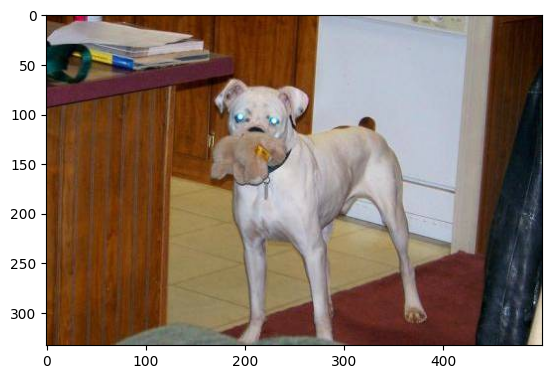

In [ ]:
dog_img = mpimg.imread("/content/train/dog.6569.jpg")
imgplt = plt.imshow(dog_img)
plt.show()

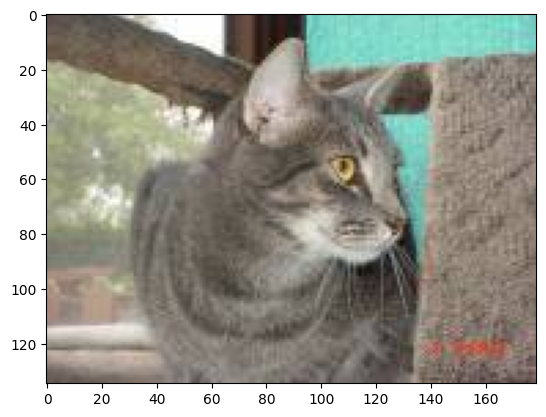

In [ ]:
cat_img = mpimg.imread("/content/train/cat.2213.jpg")
imgplt = plt.imshow(cat_img)
plt.show()

# Converting Train And Test Data Folder Into Csv Files

Train Data Convert into Csv

In [ ]:

def create_csv(folder_path, csv_filename):
    filenames = []
    labels = []

    # Iterate through all files
    for file in os.listdir(folder_path):
        if file.endswith('.jpg') or file.endswith('.png'):
            filenames.append(file)
            name = file[0:3]
            if name == 'cat':
                labels.append("cat")
            else:
                labels.append("dog")



    # Create DataFrame
    df = pd.DataFrame({"filename": filenames, "label": labels})
    df.to_csv(csv_filename, index=False)
    print(f"{csv_filename} created successfully")

create_csv('/content/train', 'train_labels.csv')

train_labels.csv created successfully


Test Data Convert into Csv

In [ ]:
def create_test_csv(folder_path, csv_filename):
    filenames = []

    # Iterate through all test images
    for file in os.listdir(folder_path):
        if file.endswith('.jpg') or file.endswith('.png'):
            filenames.append(file)

    # Create DataFrame (only filenames, no labels)
    df = pd.DataFrame({"filename": filenames})
    df.to_csv(csv_filename, index=False)
    print(f"{csv_filename} created successfully with {len(filenames)} images.")

# Call function to create CSV for test dataset
create_test_csv('/content/test1', 'test_images.csv')

test_images.csv created successfully with 12500 images.


#Define The Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3) , activation='relu', input_shape=(128,128,3) , kernel_regularizer=l2(l2=0.02)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' , kernel_regularizer=l2(l2=0.02)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.1))


model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu' , kernel_regularizer=l2(l2=0.02)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3,3) , activation='relu' , kernel_regularizer=l2(l2=0.02)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.1))

model.add(Flatten())

model.add(Dense(units=512, activation='relu' , kernel_regularizer=l2(l2=0.02)))
model.add(Dropout(rate=0.2))
model.add(BatchNormalization())

model.add(Dense(units=256, activation='relu' , kernel_regularizer=l2(l2=0.02)))
model.add(Dropout(rate=0.1))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)                   │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 63, 63, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_48               │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_49               │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_50               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 256)                 │         131,3

 Total params: 11,127,169 (42.45 MB)

 Trainable params: 11,123,713 (42.43 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])

# Loading Dataset

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Generator with Augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load Training Data
train_df = pd.read_csv('train_labels.csv')

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/train',
    x_col='filename',
    y_col='label',
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/train',
    x_col='filename',
    y_col='label',
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary',
    subset='validation'
)

# Test Data Generator
test_df = pd.read_csv("test_images.csv")
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='/content/test1',
    x_col='filename',
    target_size=(128, 128),
    batch_size=64,
    class_mode=None,
    shuffle=False
)


Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 12500 validated image filenames.


In [ ]:
model.fit(train_generator,validation_data=val_generator, epochs=100, callbacks=EarlyStopping(monitor='val_loss' , patience=10, restore_best_weights=True))

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 159ms/step - accuracy: 0.6769 - loss: 24.0687 - val_accuracy: 0.5024 - val_loss: 4.1612
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.7763 - loss: 2.8061 - val_accuracy: 0.5850 - val_loss: 1.7050
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.8108 - loss: 1.2619 - val_accuracy: 0.8216 - val_loss: 0.8992
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.8304 - loss: 0.8817 - val_accuracy: 0.8042 - val_loss: 0.8230
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 140ms/step - accuracy: 0.8511 - loss: 0.7571 - val_accuracy: 0.7342 - val_loss: 0.9722
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.8699 - loss: 0.7198 - val_accuracy: 0.8550 - val_loss: 0.7295
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.8773 - loss: 0.7051 - val_accuracy: 0.8498 - val_loss: 0.7696
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.8800 

#Evaluate The Data

In [ ]:
loss , acc = model.evaluate(val_generator)

print(f"Loss : {loss}")
print(f"Accuracy : {acc}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.9049 - loss: 0.5877
Loss : 0.5858516097068787
Accuracy : 0.9049999713897705


In [ ]:
model.history.history

{'accuracy': [0.6852499842643738,
  0.7823500037193298,
  0.8370500206947327,
  0.8672500252723694,
  0.9074000120162964,
  0.9369500279426575,
  0.9627000093460083,
  0.9714999794960022],
 'loss': [0.6237481832504272,
  0.4668152928352356,
  0.3707403540611267,
  0.3031173050403595,
  0.22375722229480743,
  0.15655261278152466,
  0.09757020324468613,
  0.07569140195846558],
 'val_accuracy': [0.5230000019073486,
  0.70660001039505,
  0.6891999840736389,
  0.8407999873161316,
  0.8592000007629395,
  0.8511999845504761,
  0.775600016117096,
  0.8371999859809875],
 'val_loss': [0.9348872303962708,
  0.5977616906166077,
  0.6662610769271851,
  0.36544373631477356,
  0.3319889307022095,
  0.36623814702033997,
  0.6332727670669556,
  0.5304168462753296]}

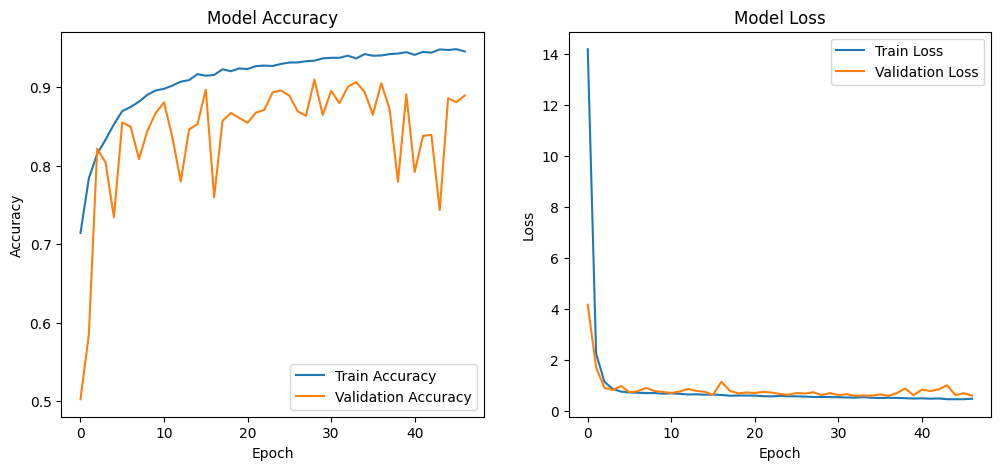

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'], label='Train Accuracy')  # Accessing from history
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')  # Accessing from history
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'], label='Train Loss')  # Accessing from history
plt.plot(model.history.history['val_loss'], label='Validation Loss')  # Accessing from history
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


In [ ]:
test_pred = model.predict(test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step


In [ ]:
true_class = test_generator.filenames

class_label = ['cat' , 'dog']

In [ ]:
pred_class = (test_pred > 0.5).astype(int)

In [ ]:
filenames = test_generator.filenames  # Get test image filenames
for i in range(10):  # Show 10 predictions
    print(f"Image: {filenames[i]}, Predicted Label: {pred_class[i][0]}")

Image: 6697.jpg, Predicted Label: 0
Image: 1411.jpg, Predicted Label: 1
Image: 6263.jpg, Predicted Label: 0
Image: 7219.jpg, Predicted Label: 1
Image: 6318.jpg, Predicted Label: 1
Image: 1637.jpg, Predicted Label: 1
Image: 2222.jpg, Predicted Label: 1
Image: 9408.jpg, Predicted Label: 0
Image: 6036.jpg, Predicted Label: 0
Image: 10004.jpg, Predicted Label: 1


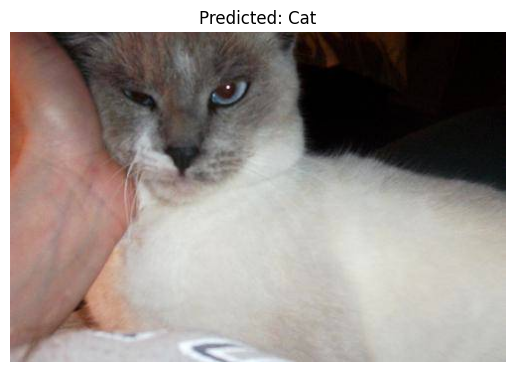

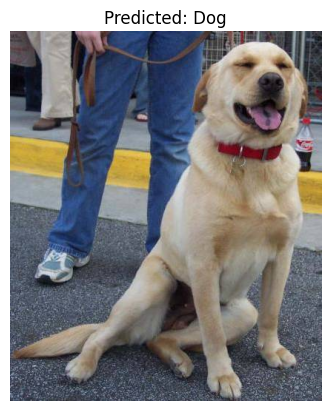

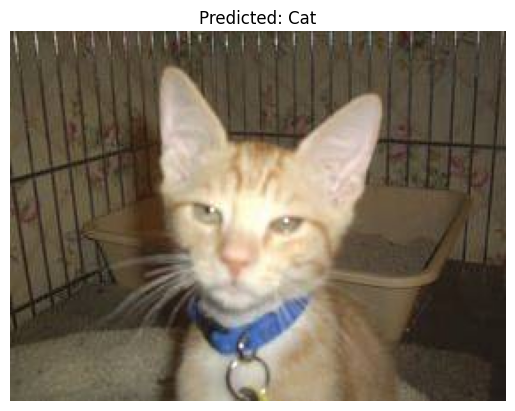

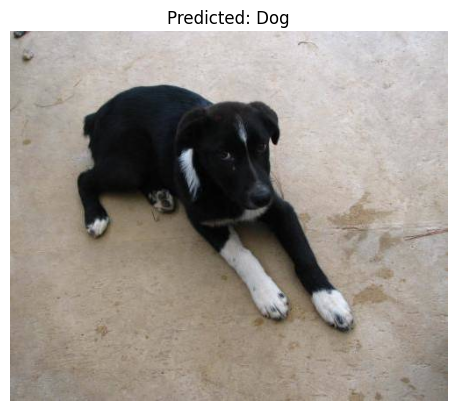

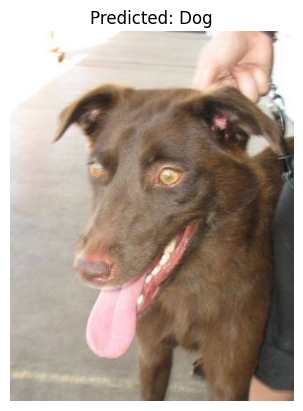

In [ ]:
for i in range(5):  # Show 5 images
    img_path = "/content/test1/" + filenames[i]  # Adjust path to match test directory
    img = mpimg.imread(img_path)

    plt.imshow(img)
    plt.title(f"Predicted: {'Dog' if pred_class[i][0] == 1 else 'Cat'}")
    plt.axis("off")
    plt.show()
